In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
matches=pd.read_csv('ipl18_20.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches[pd.isnull(matches['city'])]
#find all NaN values in winner column, so that we update this as draw

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,17-04-2014,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,19-04-2014,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,19-04-2014,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,20-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,22-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,23-04-2014,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,24-04-2014,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,25-04-2014,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,25-04-2014,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,27-04-2014,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [5]:
# Keeping only consistent teams
consistent_teams = ['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Kings XI Punjab',
                 'Sunrisers Hyderabad','Delhi Capitals']

In [6]:
matches= matches[(matches['team1'].isin(consistent_teams)) & (matches['team2'].isin(consistent_teams))]

In [7]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Delhi Capitals'], dtype=object)

In [8]:
matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Delhi Capitals'],
      dtype=object)

In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Kings XI Punjab',
                 'Sunrisers Hyderabad','Delhi Capitals']
                ,['MI','KKR','RCB','CSK','RR','KXIP','SRH','DC'],inplace=True)


matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri


In [10]:
matches['team2'].unique()

array(['KKR', 'CSK', 'RCB', 'KXIP', 'MI', 'RR', 'SRH', 'DC'], dtype=object)

In [11]:
matches['team1'].unique()

array(['RCB', 'KXIP', 'MI', 'RR', 'CSK', 'KKR', 'SRH', 'DC'], dtype=object)

In [12]:
df = pd.DataFrame(matches)
df["winner"].unique()

array(['KKR', 'CSK', 'RCB', 'RR', 'KXIP', 'MI', 'SRH', nan, 'DC'],
      dtype=object)

In [13]:
matches['winner'].fillna('Draw', inplace=True)

In [14]:
df = pd.DataFrame(matches)
df["winner"].unique()

array(['KKR', 'CSK', 'RCB', 'RR', 'KXIP', 'MI', 'SRH', 'Draw', 'DC'],
      dtype=object)

In [15]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
          'team2': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8},
         'winner': {'MI':1,'KKR':2,'RCB':3,'CSK':4,'RR':5,'KXIP':6,'SRH':7,'DC':8,'Draw':9}}
matches.replace(encode, inplace=True)
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,6,4,4,bat,4,runs,33.0,N,NaN,MR Benson,SL Shastri
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper
5,335987,Jaipur,21-04-2008,SR Watson,Sawai Mansingh Stadium,0,5,6,6,bat,5,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
7,335989,Chennai,23-04-2008,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,4,1,1,field,4,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar


In [16]:
matches["winner"].unique()

array([2, 4, 3, 5, 6, 1, 7, 9, 8], dtype=int64)

In [17]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
402,729287,NaN,19-04-2014,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
404,729291,NaN,20-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,5,6,6,field,6,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,22-04-2014,GJ Maxwell,Sharjah Cricket Stadium,1,6,7,7,field,6,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,23-04-2014,RA Jadeja,Dubai International Cricket Stadium,1,5,4,5,field,4,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,24-04-2014,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
410,729303,NaN,25-04-2014,MM Sharma,Dubai International Cricket Stadium,1,4,1,1,bat,4,wickets,7.0,N,NaN,BF Bowden,M Erasmus
414,729311,NaN,27-04-2014,DR Smith,Sharjah Cricket Stadium,1,7,4,7,bat,4,wickets,5.0,N,NaN,AK Chaudhary,VA Kulkarni
415,729313,NaN,28-04-2014,Sandeep Sharma,Dubai International Cricket Stadium,1,6,3,6,field,6,wickets,5.0,N,NaN,BF Bowden,S Ravi
417,729317,NaN,30-04-2014,B Kumar,Dubai International Cricket Stadium,1,1,7,1,field,7,runs,15.0,N,NaN,HDPK Dharmasena,M Erasmus


In [18]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               497 non-null    int64  
 1   city             497 non-null    object 
 2   date             497 non-null    object 
 3   player_of_match  495 non-null    object 
 4   venue            497 non-null    object 
 5   neutral_venue    497 non-null    int64  
 6   team1            497 non-null    int64  
 7   team2            497 non-null    int64  
 8   toss_winner      497 non-null    int64  
 9   toss_decision    497 non-null    object 
 10  winner           497 non-null    int64  
 11  result           495 non-null    object 
 12  result_margin    484 non-null    float64
 13  eliminator       495 non-null    object 
 14  method           10 non-null     object 
 15  umpire1          497 non-null    object 
 16  umpire2          497 non-null    object 
dtypes: float64(1), i

In [19]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx._get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy._get_value(1))

87
94


In [20]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [21]:
matches["winner"].unique()

array([2, 4, 3, 5, 6, 1, 7, 9, 8], dtype=int64)

In [22]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,3,2,Bangalore,field,3,M Chinnaswamy Stadium,2
1,6,4,Chandigarh,bat,4,"Punjab Cricket Association Stadium, Mohali",4


In [23]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,497.000000,497.000000,497.000000,497.000000
mean,3.927565,3.961771,3.903421,3.859155
std,2.065164,2.076303,2.095196,2.145015
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,6.000000,6.000000,6.000000,6.000000
max,8.000000,8.000000,8.000000,9.000000


In [24]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  1  0  4  0  5  3  1  3  0  2  5  0  4  1  2  1  2  3  5
  5  2  4  4  5  3  2  2  6  6  7  8  6  8  6  7  8  8  9 10  8  7 11  8
  9  9 12  7  9  9  8  8  7  9  8  8 11  2  5  0  5  0 13  2  4  2  0  1
  2  1 13  2  4  1  4  5  4  3  1  0  3  4  3  0  5 14  5  2  2  4  0  1
  3  4  5  1  2  5  3  5  2  4  0  5  3  1  3  0 14  2  0  5  2  2  4  4
  4  3  3  0  2  4  5  5  0  1  1  4  2  3  1  4  5  4  0  1  2  2  3  5
  0  5  2 14  3  0  4  0  4 15  3  1  0  4  5  3  1  3 15  5  0  4  5  4
  5  3  2  4  3  2 15  4  5  0  2  0  2 15  1  1 16  3  2  2  1 15 14  0
 15 17 17  5  5 18 18 18 19 19 19 19 19 19 18 18 19 19 18 19 16  2  0 13
  2 20 13  0  2 20  0 15 16 15 20 16 15 13 15  5  1  5 16  1  0  5  2  5
  2  2  0  5 21  4  5  2  0 13  5 22  2 21 13  0 13 22  0 13  2  4  1  0
  4  2  0 15  1  4  5  0  2  4  5  2  4 15  1  2 15  1  2 15  2 21 16  5
  0  5 15 15  1  2 15  1  2 15  0  5 22  1  0 22  1  5  0  5 17  0 15  2
 23  2  5  0  5 15 23  5  1 15  2  0  0 15  1  2  5

In [25]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  1  0  4  0  5  3  1  3  0  6  5  0  4  1  2  1  2  3  5
  5  2  4  4  5  3  2  6  7  7  8  9  7  9  7  8  9  9 10 11  9  8 12  9
 10 10 13  8 10 10  9  9  8 10  9  9 12 14  5  0  5  0 15 14  4 14  0  1
 14  1 15 14  4  1  4  5  4  3  1  0  3  4  3  0  5 16  5  6  6  4  0  1
  3  4  5  1  2  5  3  5  2  4  0  5  3  1  3  0 16  2  0  5  2  2  4  4
  4  3  3  0  2  4  5  5  0  1  1  4  2  3  1  4  5  4  0  1  2  2  3  5
  0  5  2 16  3  0  4  0  4 17  3  1  0  4  5  3  1  3 17  5  0  4  5  4
  5  3  2  4  3  2 17  4  5  0  2  0  2 17  1  1 18  3  2  2  1 17 16  0
 17 19 19  5  5 20 20 20 21 22 22 21 22 21 20 20 22 21 20 21 18  2  0 15
  2 23 15  0  2 23  0 17 18 17 23 18 17 15 17  5  1  5 18  1  0  5  2  5
 14  2  0  5 24  4  5  2  0 15  5 25  2 24 15  0 15 25  0 15  2  4  1  0
  4  2  0 17  1  4  5  0 14  4  5  2  4 17  1  2 17  1 14 17  2 24 18  5
  0  5 17 17 26  2 17 26  2 17  0  5 25 26  0 25 26  5  0  5 19  0 17  2
 27  2  5  0  5 17 27  5 26 17  2  0  0 17 26  2  5

In [26]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [27]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 87
CSK -> 78
RR -> 71
KKR -> 70
KXIP -> 63
RCB -> 62
SRH -> 46
DC -> 20
No of match winners by each team
MI -> 94
CSK -> 83
KKR -> 71
RCB -> 60
KXIP -> 60
RR -> 58
SRH -> 50
DC -> 19
Draw -> 2


Text(0.5, 1.0, 'Match winners')

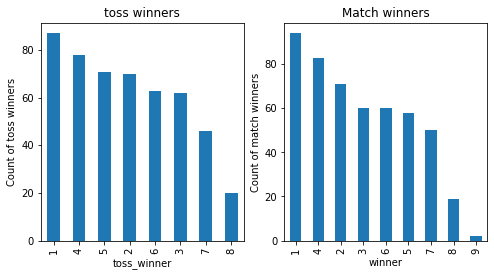

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

<AxesSubplot:>

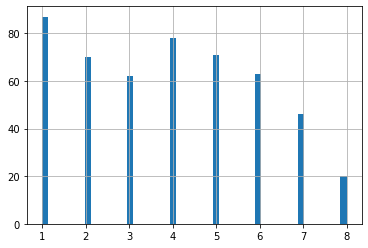

In [29]:
df['toss_winner'].hist(bins=50)

<AxesSubplot:>

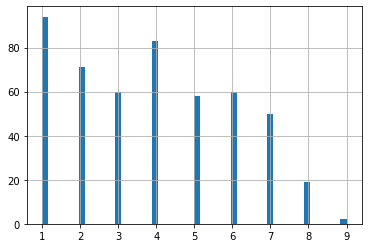

In [30]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)


<AxesSubplot:>

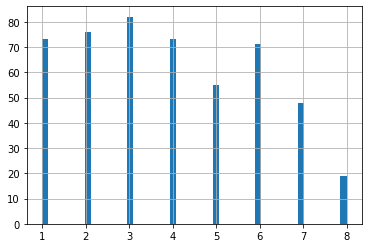

In [31]:
#shows that Mumbai won most matches followed by Chennai
df['team1'].hist(bins=50)


Text(0.5, 1.0, 'Match winners')

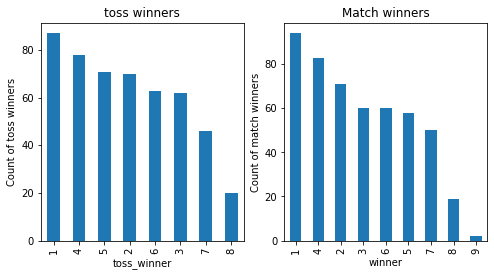

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [33]:
df.apply(lambda x: sum(x.isnull()),axis=0)


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [34]:

matches['winner'].fillna('Draw', inplace=True)

In [35]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue','team1','team2']
le = LabelEncoder()
for i in var_mod:
 df[i] = le.fit_transform(df[i])
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,1,2,1,3,13,2
1,5,3,6,0,4,20,4
3,0,2,20,0,1,28,3
5,4,5,16,0,6,23,5
7,3,0,7,1,1,15,4
...,...,...,...,...,...,...,...
811,2,0,11,1,1,6,3
812,0,7,11,1,8,6,1
813,2,6,0,1,7,25,7
814,7,6,0,0,8,25,8


In [45]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
 model.fit(data[predictors],data[outcome])
 predictions = model.predict(data[predictors])
 print(predictions)
 accuracy = metrics.accuracy_score(predictions,data[outcome])
 print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [46]:
#Logestic Regression.
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)


[3 4 1 5 1 6 3 4 4 1 1 4 5 3 2 1 1 6 4 1 6 1 5 4 2 1 4 4 4 1 5 2 1 4 5 4 3
 4 4 1 1 4 5 1 4 5 1 7 3 5 4 1 1 5 4 4 1 1 2 4 2 4 2 4 4 3 4 1 6 1 3 6 2 4
 4 2 4 4 4 4 1 5 4 3 1 4 5 1 4 6 1 1 1 4 1 6 1 4 2 6 1 2 1 2 1 4 3 4 5 6 5
 3 4 1 3 1 1 1 1 4 1 5 1 3 1 4 4 2 4 4 6 4 5 5 4 4 1 4 3 5 1 1 5 1 1 2 1 4
 1 3 4 1 1 7 1 6 3 2 4 7 6 1 7 4 3 4 1 4 4 5 1 3 5 5 4 4 4 3 1 4 1 5 6 6 1
 5 5 1 4 7 2 3 7 1 4 2 1 1 5 6 1 5 7 2 1 1 3 3 5 2 4 2 1 5 6 3 1 6 6 6 1 2
 4 5 4 7 2 4 5 4 7 2 6 2 7 6 3 6 1 2 2 5 3 1 7 6 2 1 3 4 2 7 1 7 4 1 6 7 3
 3 5 4 6 3 3 1 3 7 4 4 2 3 7 1 4 1 4 7 6 1 5 5 4 5 1 4 2 2 3 1 5 1 6 1 7 1
 1 7 3 2 2 4 1 4 7 2 3 2 6 4 7 1 4 6 2 1 2 7 2 2 6 7 1 6 3 4 6 1 1 6 1 1 2
 7 2 1 6 2 3 6 1 1 7 4 2 5 1 6 3 7 1 5 3 1 2 2 1 1 7 7 5 1 5 2 7 1 4 2 1 3
 5 5 7 7 2 6 7 2 6 6 7 7 2 1 7 1 4 7 3 7 5 1 7 3 4 1 9 1 6 2 1 5 2 1 6 2 7
 1 6 7 7 2 1 7 5 3 7 6 3 2 1 7 4 1 7 3 6 5 6 7 6 6 1 1 7 7 1 3 7 1 2 5 3 7
 1 7 3 5 3 2 5 6 7 1 7 4 3 3 4 5 7 4 4 6 7 5 1 4 6 7 4 1 7 4 5 2 5 6 5 2 7
 2 6 5 7 1 3 7 7 4 5 7 1 

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hprak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)


[3 5 1 5 1 1 9 3 4 1 5 5 4 3 2 2 3 6 4 1 6 1 4 2 2 1 4 4 2 5 5 2 3 4 5 2 3
 4 5 1 1 4 5 1 4 1 1 7 5 5 4 1 1 5 4 2 1 4 2 4 4 2 2 4 2 3 5 1 4 1 3 6 2 4
 5 2 4 5 4 2 4 5 1 3 5 3 5 3 2 4 1 1 2 4 3 6 1 4 2 6 1 2 5 2 1 4 3 2 5 1 4
 3 4 1 3 1 5 1 1 4 1 7 1 3 1 4 2 2 4 5 6 4 1 5 5 4 2 4 3 5 1 1 5 1 3 2 1 6
 4 3 4 3 1 5 1 5 3 4 2 5 6 4 7 2 3 4 1 6 2 7 1 3 5 1 1 4 2 3 1 6 1 7 6 7 2
 5 1 1 5 7 1 3 1 4 7 2 1 1 5 6 2 5 7 4 1 1 5 3 7 6 5 2 4 1 3 3 1 4 6 3 1 2
 3 7 4 7 2 4 7 1 5 2 1 2 7 6 3 2 1 2 2 5 3 1 7 4 2 1 6 1 2 8 1 1 5 3 6 1 3
 5 1 4 7 9 3 1 3 7 1 4 2 3 2 4 2 1 4 7 6 1 7 5 4 7 1 4 4 2 6 1 7 7 6 1 7 6
 1 7 3 2 2 5 3 2 7 2 3 2 6 6 7 1 4 1 2 3 2 7 1 2 7 1 1 3 3 1 6 1 1 6 1 1 2
 7 3 7 3 2 3 5 1 1 7 4 2 7 1 1 3 7 1 7 3 3 2 1 4 1 7 7 5 1 4 7 4 1 4 2 1 6
 5 7 4 5 2 2 5 4 2 1 5 7 2 3 5 6 7 7 4 7 5 1 8 3 4 7 6 1 7 3 1 5 8 1 6 2 7
 1 6 5 1 2 5 8 7 3 7 6 3 2 3 7 7 1 7 9 7 1 6 7 3 6 1 3 8 2 1 1 7 1 7 5 6 7
 1 7 1 7 6 2 6 5 7 1 5 4 1 6 4 5 1 7 2 7 7 5 1 4 3 8 4 1 5 4 7 2 4 8 5 6 1
 2 5 1 7 1 1 7 7 4 5 8 1 

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[3 4 1 5 1 6 5 4 3 1 1 2 5 6 1 2 1 4 6 1 6 1 5 4 5 6 4 4 2 5 4 4 1 3 4 1 5
 3 6 1 3 2 4 1 3 1 3 4 4 4 4 1 2 1 3 3 1 1 2 3 3 1 2 3 4 3 5 1 4 1 3 6 1 6
 5 1 4 2 4 6 4 5 6 3 5 4 5 1 2 6 1 1 4 4 1 6 5 4 2 6 4 3 5 2 1 4 6 4 3 6 5
 3 6 1 3 1 4 1 1 4 1 5 5 3 1 4 2 2 5 2 6 4 1 5 1 4 2 4 6 6 1 1 4 1 1 4 1 6
 5 1 1 1 1 7 5 4 3 4 2 5 2 5 7 4 3 4 1 4 2 5 1 4 5 1 7 4 2 6 1 7 1 4 6 7 2
 3 1 1 6 7 1 3 7 3 5 2 1 1 5 5 3 6 6 3 1 3 3 2 6 4 1 4 4 1 6 1 1 2 5 6 4 2
 3 1 4 7 2 4 2 5 7 2 6 3 4 6 3 2 1 2 4 4 6 1 4 4 3 6 3 5 2 5 1 1 5 1 5 4 3
 5 1 4 7 5 4 1 3 7 6 4 2 6 4 4 2 1 4 7 6 1 2 3 4 1 1 4 4 4 3 1 2 7 2 1 7 1
 1 7 2 2 4 6 1 4 7 3 6 2 1 7 7 1 1 1 2 1 2 7 1 3 7 7 1 6 2 7 2 6 1 2 1 4 2
 7 4 7 3 2 3 4 1 5 7 4 2 4 5 1 3 7 1 5 2 1 2 1 4 1 2 7 5 1 5 2 4 1 1 2 1 3
 5 2 4 6 5 2 4 4 2 1 5 8 2 2 7 1 8 7 4 6 5 4 8 2 4 7 3 5 7 4 6 4 2 1 3 4 7
 1 6 7 1 2 5 4 2 3 5 4 3 5 1 5 8 1 7 3 4 1 2 4 3 6 1 1 4 4 5 2 5 2 7 5 2 7
 1 5 2 7 1 2 2 5 7 1 6 4 1 2 4 3 8 4 4 3 8 7 1 3 2 7 4 1 5 2 1 2 1 8 5 1 1
 2 5 1 8 1 1 5 5 4 1 6 3 

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [49]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor)
# Create SVM classification object 
model = svm.SVC(kernel='rbf',gamma='auto') 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will
classification_model(model, df,predictor_var,outcome_var)


[3 6 1 5 4 6 3 4 3 1 5 6 5 3 1 2 1 4 6 1 6 1 5 2 2 1 4 4 2 5 4 5 1 3 4 2 5
 3 6 1 3 6 4 1 3 6 3 5 4 4 4 1 3 1 3 5 1 2 2 4 3 1 2 3 2 3 5 1 4 1 3 6 1 6
 5 1 4 6 4 2 4 5 6 3 5 4 5 1 2 4 1 1 4 4 1 6 5 4 2 6 1 2 5 2 1 4 3 2 5 6 5
 3 6 1 3 1 4 1 4 4 4 5 5 3 1 4 2 2 3 6 6 4 1 5 6 4 2 4 3 6 1 1 5 1 1 2 1 6
 5 1 1 1 4 7 5 6 3 4 2 5 6 5 7 2 3 4 1 4 2 5 1 4 5 1 7 4 2 3 1 3 1 7 6 7 2
 5 1 1 6 7 6 3 7 4 5 2 1 1 5 5 3 6 6 4 2 4 5 6 4 6 5 6 4 1 3 5 1 6 6 3 1 2
 3 1 4 7 2 4 2 5 7 2 6 2 7 6 3 2 1 2 4 4 3 1 5 4 2 1 3 5 2 5 1 2 5 1 6 7 3
 5 1 4 7 3 4 1 3 7 6 4 2 3 7 4 2 1 4 7 6 1 2 6 5 1 1 4 4 2 3 1 2 1 6 1 7 1
 1 7 2 2 6 6 1 6 7 2 3 2 7 3 7 1 6 1 2 1 2 7 1 2 7 7 1 3 2 7 6 1 1 2 1 1 2
 7 4 1 3 2 3 6 1 5 7 4 2 7 5 1 3 7 1 5 2 1 2 1 4 1 6 7 5 1 5 2 4 1 6 2 1 3
 5 2 4 4 2 2 4 4 2 1 5 8 2 1 7 1 8 7 4 6 5 1 7 2 4 1 3 5 7 4 1 5 2 1 6 2 8
 1 6 7 1 2 5 8 7 3 5 4 3 2 4 5 8 1 7 3 4 1 6 8 3 6 1 1 8 4 1 4 8 1 7 5 2 7
 1 8 2 7 1 2 2 5 7 1 8 6 1 2 4 5 8 7 6 7 8 6 1 4 2 7 4 1 5 4 1 2 6 7 5 3 1
 4 5 1 8 3 1 7 7 4 2 7 3 

C:\Users\hprak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=10, min_samples_leaf=2)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)


[3 4 3 5 1 6 5 4 3 1 5 2 5 3 1 2 1 4 6 1 5 1 5 4 5 6 4 4 2 5 4 4 1 3 4 2 5
 3 6 1 2 6 4 1 3 6 3 6 5 4 4 1 3 1 3 1 1 4 2 4 3 1 2 3 2 3 5 3 4 1 3 5 1 6
 5 1 4 6 4 2 1 5 1 3 5 4 3 1 2 4 1 1 4 4 1 6 2 4 2 5 4 3 5 2 1 4 3 2 4 6 5
 3 6 1 3 1 4 1 3 4 1 5 2 3 1 4 2 2 5 2 6 4 6 5 1 4 2 4 3 5 1 1 4 1 1 4 1 6
 5 4 2 1 1 7 2 4 3 4 2 5 6 5 7 4 3 4 1 4 2 5 3 4 5 6 7 4 2 3 1 3 1 4 5 7 2
 4 1 1 6 7 6 3 2 4 5 1 1 1 1 5 1 6 6 4 3 4 5 6 3 6 5 7 4 1 3 2 1 4 5 6 4 2
 3 1 4 7 1 4 2 5 7 2 6 3 4 5 3 2 1 2 4 4 2 1 5 4 3 6 3 5 2 4 1 2 5 1 6 7 3
 3 1 4 7 5 4 1 3 7 1 4 2 3 7 1 2 1 4 7 6 1 3 4 5 1 1 3 4 1 3 1 2 7 2 1 7 6
 1 7 2 2 7 3 1 1 6 3 3 2 2 3 7 1 3 1 2 1 2 7 1 3 6 7 1 6 2 7 2 6 1 2 1 4 2
 7 4 7 3 2 3 4 1 2 6 4 2 4 5 1 3 7 1 5 2 3 2 1 4 1 6 7 5 1 5 2 4 1 3 2 1 3
 3 2 4 4 5 2 4 4 2 1 5 4 2 1 5 6 8 7 4 6 5 4 8 2 4 7 8 2 6 4 6 4 2 1 3 4 7
 1 6 7 1 2 5 8 7 3 5 4 3 5 1 5 8 1 7 5 4 1 2 8 3 6 1 1 6 4 1 4 8 2 1 4 2 6
 1 8 2 7 1 2 8 4 7 1 4 6 1 2 4 3 8 3 6 7 8 6 1 3 6 7 3 1 5 4 1 2 3 7 1 3 1
 4 5 1 8 3 1 7 4 3 2 6 3 

In [51]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state =15)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\hprak\AppData\Local\Temp\ipykernel_12976\3867564518.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[3 4 3 5 1 6 9 4 4 1 5 2 5 3 1 2 1 4 6 1 6 1 3 4 5 6 4 4 2 5 4 5 1 3 4 2 5
 3 6 1 3 6 4 1 3 6 3 5 5 4 4 1 3 1 3 5 4 2 2 4 3 1 2 3 4 3 5 3 6 1 3 5 1 2
 5 1 4 3 4 6 4 5 1 3 5 4 3 1 2 4 1 1 4 4 1 6 2 4 2 6 1 3 5 2 1 4 3 4 5 6 3
 3 6 5 4 1 4 1 3 4 1 5 2 3 1 4 2 2 5 2 3 4 1 5 1 6 2 4 3 5 1 1 4 1 1 4 1 6
 5 4 2 1 1 7 2 4 3 4 2 5 6 5 7 4 3 4 1 4 2 5 3 4 5 1 7 4 2 3 4 3 1 4 6 7 2
 5 1 1 6 7 6 3 7 4 5 1 1 2 6 5 3 6 6 4 2 4 5 6 4 6 5 7 4 1 3 5 1 6 7 6 1 2
 5 1 4 7 2 3 2 1 7 2 6 3 7 6 3 2 1 2 4 6 2 1 5 4 3 6 3 1 2 5 4 2 5 1 6 7 4
 3 1 4 7 9 4 1 3 7 1 4 2 3 7 4 2 3 4 7 3 1 3 4 5 1 1 3 4 1 3 1 2 7 2 1 7 6
 1 7 2 2 7 3 1 6 7 3 3 2 7 3 7 1 6 1 2 1 2 7 1 3 7 7 3 6 2 7 2 6 1 2 1 1 2
 7 4 7 3 2 5 6 1 2 7 4 2 4 5 1 4 7 1 5 2 3 2 1 4 1 6 7 5 1 5 2 4 1 3 2 1 3
 3 2 4 4 5 2 4 4 2 8 5 4 2 1 7 6 8 7 4 6 5 1 7 2 4 7 8 2 7 4 6 4 8 1 3 4 8
 1 6 7 1 2 5 8 7 4 8 4 3 5 1 5 8 1 7 9 4 1 2 8 3 6 1 1 8 4 1 4 8 3 7 5 2 6
 1 8 2 7 1 2 8 4 5 1 8 6 1 2 4 3 8 7 6 7 8 6 1 3 2 7 4 1 5 4 1 2 6 7 5 3 1
 4 5 1 8 3 1 7 8 4 2 6 3 